In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt

/kaggle/input/amazon-books-dataset/Amazon_Books_Scraping/Genre_df.csv
/kaggle/input/amazon-books-dataset/Amazon_Books_Scraping/Books_df.csv
/kaggle/input/amazon-books-dataset/Amazon_Books_Scraping/Sub_Genre_df.csv


In [2]:
df_books = pd.read_csv('/kaggle/input/amazon-books-dataset/Amazon_Books_Scraping/Books_df.csv')
df_genre= pd.read_csv('/kaggle/input/amazon-books-dataset/Amazon_Books_Scraping/Genre_df.csv')
df_sub_genre= pd.read_csv('/kaggle/input/amazon-books-dataset/Amazon_Books_Scraping/Sub_Genre_df.csv')

In [3]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7928 entries, 0 to 7927
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           7928 non-null   int64  
 1   Title                7928 non-null   object 
 2   Author               7907 non-null   object 
 3   Main Genre           7928 non-null   object 
 4   Sub Genre            7928 non-null   object 
 5   Type                 7928 non-null   object 
 6   Price                7928 non-null   object 
 7   Rating               7928 non-null   float64
 8   No. of People rated  7928 non-null   float64
 9   URLs                 7928 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 619.5+ KB


In [4]:
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 35 non-null     object
 1   Number of Sub-genres  35 non-null     int64 
 2   URL                   35 non-null     object
dtypes: int64(1), object(2)
memory usage: 968.0+ bytes


In [5]:
df_sub_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         329 non-null    object 
 1   Main Genre    329 non-null    object 
 2   No. of Books  329 non-null    float64
 3   URLs          329 non-null    object 
dtypes: float64(1), object(3)
memory usage: 10.4+ KB


In [6]:
df_genre.head()

,Title,Number of Sub-genres,URL
0,Action & Adventure,0,https://www.amazon.in/gp/bestsellers/books/131...
1,"Arts, Film & Photography",11,https://www.amazon.in/gp/bestsellers/books/131...
2,"Biographies, Diaries & True Accounts",3,https://www.amazon.in/gp/bestsellers/books/131...
3,Business & Economics,4,https://www.amazon.in/gp/bestsellers/books/131...
4,Children's Books,34,https://www.amazon.in/gp/bestsellers/books/646...


In [7]:
df_sub_genre.head()

,Title,Main Genre,No. of Books,URLs
0,Architecture,"Arts, Film & Photography",100.0,https://www.amazon.in/gp/bestsellers/books/131...
1,Cinema & Broadcast,"Arts, Film & Photography",100.0,https://www.amazon.in/gp/bestsellers/books/131...
2,Dance,"Arts, Film & Photography",100.0,https://www.amazon.in/gp/bestsellers/books/131...
3,Design & Fashion,"Arts, Film & Photography",100.0,https://www.amazon.in/gp/bestsellers/books/131...
4,Museums & Museology,"Arts, Film & Photography",100.0,https://www.amazon.in/gp/bestsellers/books/131...


### We here work with Books_df.csv only

In [8]:
df_books.columns



Index(['Unnamed: 0', 'Title', 'Author', 'Main Genre', 'Sub Genre', 'Type',
       'Price', 'Rating', 'No. of People rated', 'URLs'],
      dtype='object')

In [9]:
unique_elements = df_books["Main Genre"].unique()
print(unique_elements)

['Arts, Film & Photography' 'Biographies, Diaries & True Accounts'
 'Business & Economics' "Children's Books" 'Comics & Mangas'
 'Computing, Internet & Digital Media' 'Crafts, Home & Lifestyle'
 'Crime, Thriller & Mystery' 'Engineering' 'Exam Preparation'
 'Fantasy, Horror & Science Fiction'
 'Health, Family & Personal Development' 'Higher Education Textbooks'
 'History' 'Language, Linguistics & Writing' 'Law' 'Literature & Fiction'
 'Medicine & Health Sciences' 'Politics' 'Reference' 'Religion' 'Romance'
 'School Books' 'Science & Mathematics' 'Sciences, Technology & Medicine'
 'Society & Social Sciences' 'Sports' 'Teen & Young Adult'
 'Textbooks & Study Guides' 'Travel']


## Missing values


In [10]:
df_books.isna().any()

Unnamed: 0             False
Title                  False
Author                  True
Main Genre             False
Sub Genre              False
Type                   False
Price                  False
Rating                 False
No. of People rated    False
URLs                   False
dtype: bool

In [11]:
df_books.isna().sum()

Unnamed: 0              0
Title                   0
Author                 21
Main Genre              0
Sub Genre               0
Type                    0
Price                   0
Rating                  0
No. of People rated     0
URLs                    0
dtype: int64

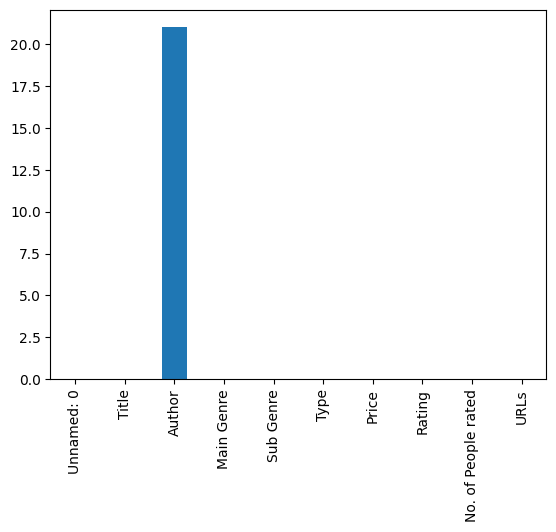

In [12]:
df_books.isna().sum().plot(kind="bar")
plt.show()

In [13]:
df_books.shape

(7928, 10)

In [14]:
df_books_dropped = df_books.dropna()

### HotEncoding


In [15]:
hot_encoded = pd.get_dummies(df_books_dropped['Main Genre'],dtype= int) 

In [16]:
hot_encoded 

,"Arts, Film & Photography","Biographies, Diaries & True Accounts",Business & Economics,Children's Books,Comics & Mangas,"Computing, Internet & Digital Media","Crafts, Home & Lifestyle","Crime, Thriller & Mystery",Engineering,Exam Preparation,...,Religion,Romance,School Books,Science & Mathematics,"Sciences, Technology & Medicine",Society & Social Sciences,Sports,Teen & Young Adult,Textbooks & Study Guides,Travel
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
df_books_dropped = df_books_dropped.rename(columns={'Unnamed: 0': 'ID'})

df_books_dropped.columns


Index(['ID', 'Title', 'Author', 'Main Genre', 'Sub Genre', 'Type', 'Price',
       'Rating', 'No. of People rated', 'URLs'],
      dtype='object')

In [18]:
df =df_books_dropped.loc[:, ['Rating']] 
df= pd.concat([df, hot_encoded], axis=1)
df

,Rating,"Arts, Film & Photography","Biographies, Diaries & True Accounts",Business & Economics,Children's Books,Comics & Mangas,"Computing, Internet & Digital Media","Crafts, Home & Lifestyle","Crime, Thriller & Mystery",Engineering,...,Religion,Romance,School Books,Science & Mathematics,"Sciences, Technology & Medicine",Society & Social Sciences,Sports,Teen & Young Adult,Textbooks & Study Guides,Travel
0,4.4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7923,4.7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7924,4.4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7925,4.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7926,4.7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Scaling and Spliting

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [20]:
scalerItem = StandardScaler()
scalerItem.fit(df)
df_scaled = scalerItem.transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns) # ndarry to dataframe
df_scaled


,Rating,"Arts, Film & Photography","Biographies, Diaries & True Accounts",Business & Economics,Children's Books,Comics & Mangas,"Computing, Internet & Digital Media","Crafts, Home & Lifestyle","Crime, Thriller & Mystery",Engineering,...,Religion,Romance,School Books,Science & Mathematics,"Sciences, Technology & Medicine",Society & Social Sciences,Sports,Teen & Young Adult,Textbooks & Study Guides,Travel
0,0.153511,6.207657,-0.113177,-0.139059,-0.470475,-0.113177,-0.215208,-0.198588,-0.079773,-0.079773,...,-0.198588,-0.407073,-0.113177,-0.139059,-0.161091,-0.161091,-0.34797,-0.214887,-0.079773,-0.079773
1,0.263199,6.207657,-0.113177,-0.139059,-0.470475,-0.113177,-0.215208,-0.198588,-0.079773,-0.079773,...,-0.198588,-0.407073,-0.113177,-0.139059,-0.161091,-0.161091,-0.34797,-0.214887,-0.079773,-0.079773
2,0.372887,6.207657,-0.113177,-0.139059,-0.470475,-0.113177,-0.215208,-0.198588,-0.079773,-0.079773,...,-0.198588,-0.407073,-0.113177,-0.139059,-0.161091,-0.161091,-0.34797,-0.214887,-0.079773,-0.079773
3,0.372887,6.207657,-0.113177,-0.139059,-0.470475,-0.113177,-0.215208,-0.198588,-0.079773,-0.079773,...,-0.198588,-0.407073,-0.113177,-0.139059,-0.161091,-0.161091,-0.34797,-0.214887,-0.079773,-0.079773
4,0.263199,6.207657,-0.113177,-0.139059,-0.470475,-0.113177,-0.215208,-0.198588,-0.079773,-0.079773,...,-0.198588,-0.407073,-0.113177,-0.139059,-0.161091,-0.161091,-0.34797,-0.214887,-0.079773,-0.079773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,0.482576,-0.161091,-0.113177,-0.139059,-0.470475,-0.113177,-0.215208,-0.198588,-0.079773,-0.079773,...,-0.198588,-0.407073,-0.113177,-0.139059,-0.161091,-0.161091,-0.34797,-0.214887,-0.079773,12.535549
7903,0.153511,-0.161091,-0.113177,-0.139059,-0.470475,-0.113177,-0.215208,-0.198588,-0.079773,-0.079773,...,-0.198588,-0.407073,-0.113177,-0.139059,-0.161091,-0.161091,-0.34797,-0.214887,-0.079773,12.535549
7904,0.263199,-0.161091,-0.113177,-0.139059,-0.470475,-0.113177,-0.215208,-0.198588,-0.079773,-0.079773,...,-0.198588,-0.407073,-0.113177,-0.139059,-0.161091,-0.161091,-0.34797,-0.214887,-0.079773,12.535549
7905,0.482576,-0.161091,-0.113177,-0.139059,-0.470475,-0.113177,-0.215208,-0.198588,-0.079773,-0.079773,...,-0.198588,-0.407073,-0.113177,-0.139059,-0.161091,-0.161091,-0.34797,-0.214887,-0.079773,12.535549


In [21]:
X = df_scaled.drop(columns=['Rating'])
y = df_scaled['Rating']
y

0       0.153511
1       0.263199
2       0.372887
3       0.372887
4       0.263199
          ...   
7902    0.482576
7903    0.153511
7904    0.263199
7905    0.482576
7906   -0.394930
Name: Rating, Length: 7907, dtype: float64

In [22]:
# spliting 

X_train,X_test, y_train, y_test = train_test_split(X,y, train_size=0.80, shuffle=True, random_state=1)

print(X_train.shape)
print(X_test.shape)

(6325, 30)
(1582, 30)


### Neural Network for content-based filtering

In [23]:
import tensorflow as tf
from tensorflow import keras

2024-04-19 04:20:44.294794: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-19 04:20:44.294920: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-19 04:20:44.451151: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [24]:
num_outputs = 32

input_shape = X_train.shape[1]

NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=256, activation="relu", input_shape=(input_shape,)),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=num_outputs, activation="linear")
])

print(NN.summary())

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,960 (175.62 KB)

 Trainable params: 44,960 (175.62 KB)

 Non-trainable params: 0 (0.00 B)

None


In [25]:
NN.compile(loss= 'mean_squared_error', optimizer= 'adam')
history = NN.fit(X_train,y_train, epochs = 20,batch_size= 20, validation_split= 0.2)

Epoch 1/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9847 - val_loss: 0.8321
Epoch 2/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9169 - val_loss: 0.8179
Epoch 3/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9287 - val_loss: 0.8179
Epoch 4/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9207 - val_loss: 0.8248
Epoch 5/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8678 - val_loss: 0.8298
Epoch 6/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9921 - val_loss: 0.8237
Epoch 7/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9449 - val_loss: 0.8220
Epoch 8/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8325 - val_loss: 0.8365
Epoch 9/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9391 - val_loss: 0.8194
Epoch 10/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9448 - val_loss: 0.8244
Epoch 11/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9992 - val_loss: 0.8203
Epoch 12/20
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [26]:
test_loss = NN.evaluate(X_test, y_test)
print(test_loss)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7490
0.9555821418762207


### Similar Books

In [27]:

input_item_b = tf.keras.layers.Input(shape=(input_shape,))
vm_b = NN(input_item_b)
model_b = tf.keras.Model(input_item_b, vm_b)

print(model_b.summary())

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 32)             │        44,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,960 (175.62 KB)

 Trainable params: 44,960 (175.62 KB)

 Non-trainable params: 0 (0.00 B)

None


In [28]:
books_vector = model_b.predict(X)
print(books_vector.shape)
print(X.shape)

248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(7907, 32)
(7907, 30)


for finding similar movies we will calculate the distance between the movies , similar movies are nearer

In [29]:

# funtion to caculte the distance between the vectors 
def sq_distance(a,b):
    d = np.sum((a-b)**2)
    return d

#This didnot work took large comutation so we used vectorized computation instead of calling the function


In [30]:
num_books = len(books_vector)
distance_matrix = np.zeros((num_books, num_books))
# Vectorized computation of distance matrix
distance_matrix = np.sum((books_vector[:, np.newaxis] - books_vector[np.newaxis, :]) ** 2, axis=-1)


In [31]:
import numpy.ma as ma

In [32]:
# now we need to mask the diagonal
masked_dmat = ma.masked_array(distance_matrix, mask=np.identity(distance_matrix.shape[0]))  # mask the diagonal

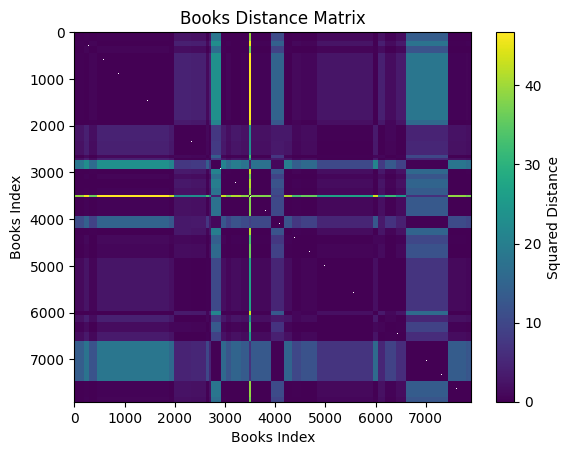

In [33]:
# Plot the distance matrix
plt.imshow(masked_dmat, cmap='viridis', interpolation='none', aspect='auto')
plt.colorbar(label='Squared Distance')
plt.title('Books Distance Matrix')
plt.xlabel('Books Index')
plt.ylabel('Books Index')
plt.show()

In [34]:
def get_top_similar_books_names(book_name, book_names=df_books_dropped['Title'].tolist(), masked_distance_matrix=masked_dmat, top_n=10):
    # Find index of the given book name
    book_index = book_names.index(book_name)
    
    # Find indices of top similar books
    top_similar_indices = np.argsort(masked_distance_matrix[book_index])[:top_n]
    
    # Get names of top similar books
    similar_books = [book_names[idx] for idx in top_similar_indices]
    
    return  top_similar_indices ,similar_books


In [35]:
book_name = 'KING: Alliance Series Book Two'  # Example book name
top_similar_books_indices, top_similar_books_names = get_top_similar_books_names(book_name)

print(f"Top 10 Similar Books to '{book_name}':")

for i, similar_book in zip(top_similar_books_indices, top_similar_books_names):
    print(f"{i }. {similar_book}")


Top 10 Similar Books to 'KING: Alliance Series Book Two':
5792. Consolation (The Salvation Series Book 3)
5418. The Mobster's Masseuse
5417. A Dirty Business (Kings of New York)
5416. Kingdom Of Sinners (Bitter Love Duet Series Book 1)
5415. Bound By Vengeance (Born in Blood Mafia Chronicles Book 5)
5414. Meera's Devil Mafia: A Curvy Girl Romance
5413. Ashes (Smoke Series Book 10)
5412. Stolen Vows: A Dark Mafia Romance
5411. Code of Silence: A Mafia Romance (The Dark Kingdom Book 1)
5410. Contracted to the Devil: Dark Mafia Arranged Marriage: Agostino Crime Family
